In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

SEED = 123

In [2]:
df = pd.read_csv('weather_classification_data.csv')
df

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0                   1010.82         2  Winter              3.5    inland   
1                   1011.43         7  Spring             10.0    inland   
2                   1018.72         5  Spring              5.5  mountain   
3                   1026.25         7  Spring              1.0   coastal   
4                    990.67         1  Winter              2.5  mountain   
...                     ...       ...     ...              ...       ...   
13195               1003.15         1  Summer              1.0  mountain   
13196               1067.23         1  Winter              6.0   coastal   
13197               1012.69         3  Autumn              9.0   coastal   
13198                984.27         0  Winter              2.0    inland   
13199               1015.37         5  Autumn             10.0  mountain   

      Weather Type  
0            Rainy  
1           Cloudy  
2            Sunny  
3            Sunny  
4            Rainy  
...            ...  
13195        Rainy  
13196        Snowy  
13197       Cloudy  
13198        Snowy  
13199        Rainy  

[13200 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [4]:
df.describe()

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

In [6]:
df.columns = [col.lower().replace(' ','_') for col in df.columns]

In [7]:
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'precipitation_(%)',
       'cloud_cover', 'atmospheric_pressure', 'uv_index', 'season',
       'visibility_(km)', 'location', 'weather_type'],
      dtype='object')

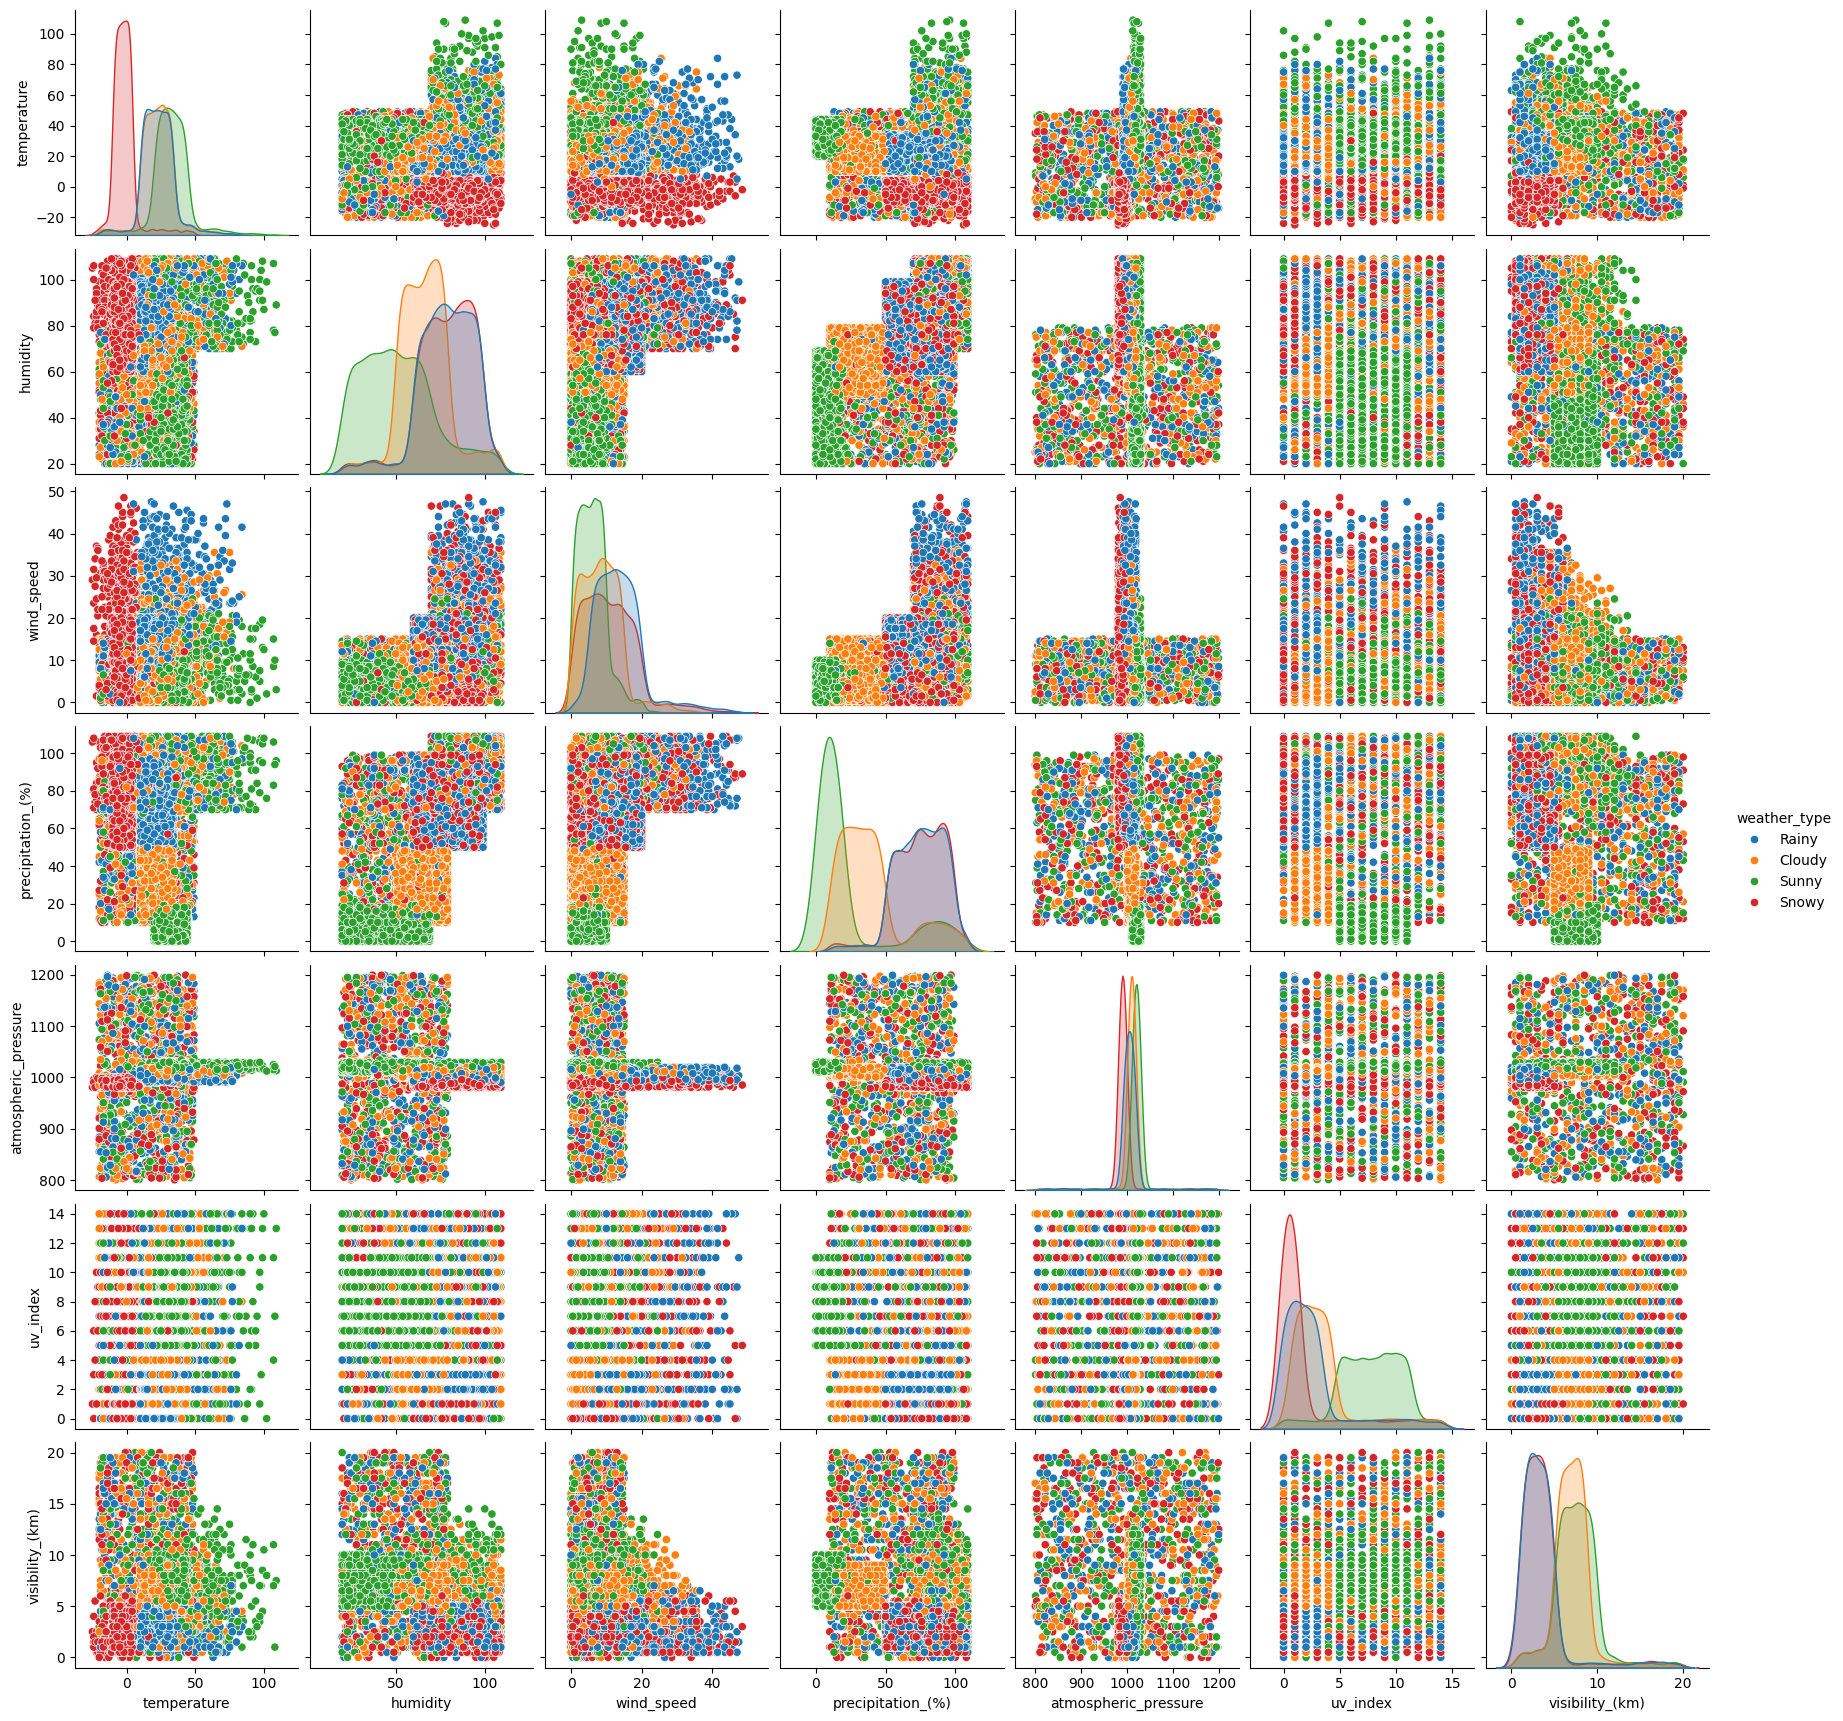

In [9]:
sns.pairplot(data=df,hue='weather_type')

In [10]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
object_cols = [col for col in df.columns if df[col].dtype == 'object']

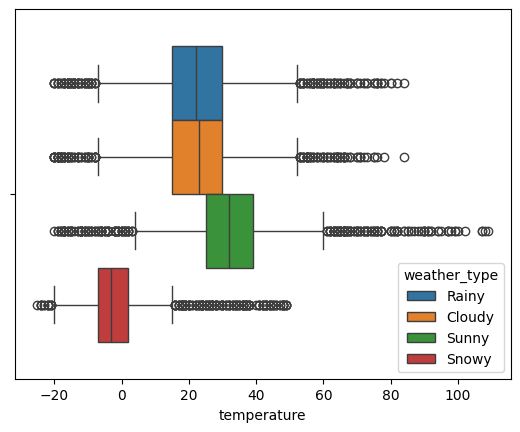

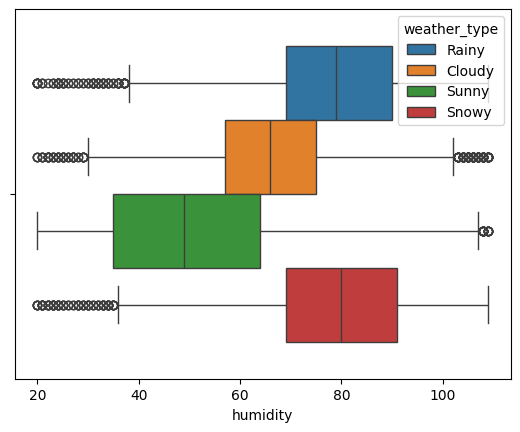

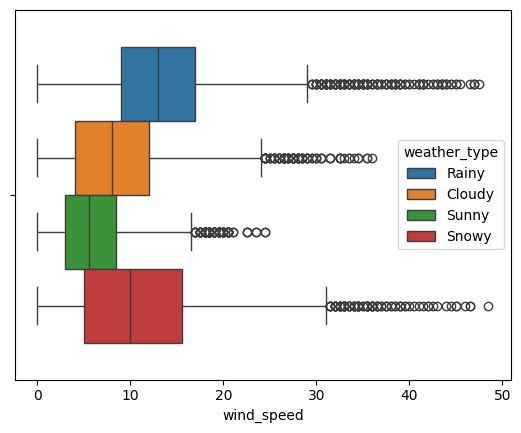

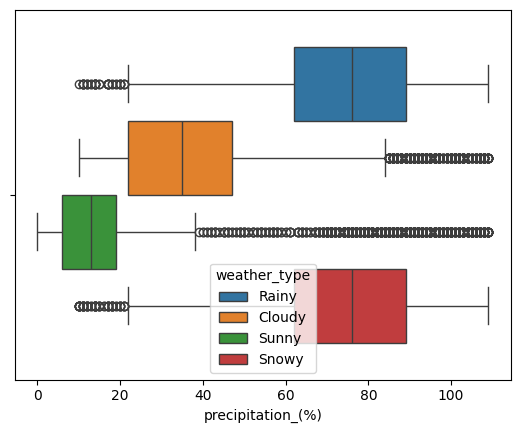

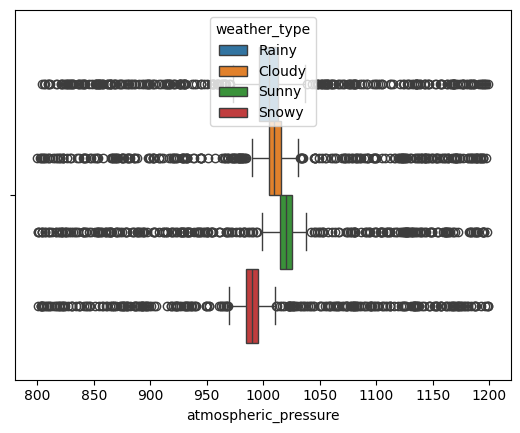

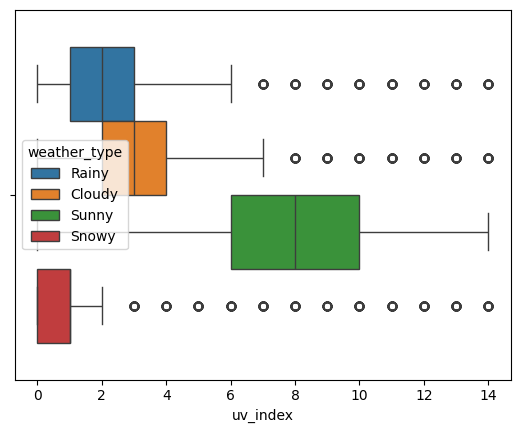

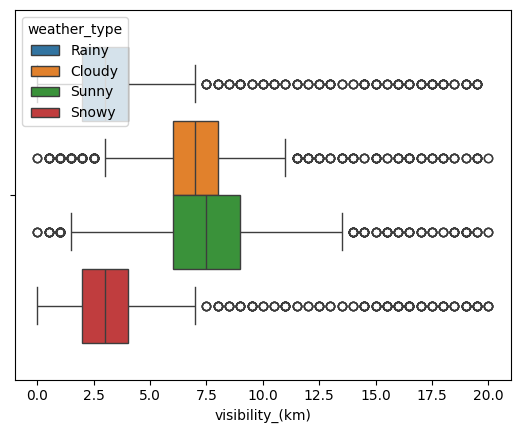

In [14]:
for col in num_cols:
    sns.boxplot(data=df,x=col,hue='weather_type')
    # sns.histplot(data=df,x=col,hue='weather_type',kde=True)
    plt.show()

## Split & 전처리

- 수치형 -> robust : 이상치가 많음
- 범주형 -> onehot : 순서 의미 x

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('weather_type',axis=1)
y = df['weather_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_s = rs.fit_transform(X_train[num_cols])
X_test_s = rs.transform(X_test[num_cols])
X_train_s

array([[ 0.37037037, -0.14814815, -0.35294118, ...,  0.11385286,
        -0.16666667, -0.77777778],
       [-0.25925926,  0.96296296,  0.23529412, ...,  0.42465282,
        -0.5       , -0.22222222],
       [ 0.22222222, -0.44444444, -0.29411765, ...,  0.8098244 ,
         1.16666667,  0.88888889],
       ...,
       [ 0.44444444, -0.66666667, -0.23529412, ...,  0.07207621,
        -0.33333333,  0.66666667],
       [-0.48148148,  0.11111111,  0.11764706, ..., -0.35211753,
         1.83333333,  0.66666667],
       [-0.40740741,  0.92592593, -0.41176471, ..., -0.45724779,
        -0.16666667, -0.22222222]])

In [24]:
type(X_train_s), X_train_s.shape, X_test_s.shape, y_train.shape, y_test.shape

(numpy.ndarray, (10560, 7), (2640, 7), (10560,), (2640,))

In [20]:
for col in object_cols:
    print(df[col].value_counts())

cloud_cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64
season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64
location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64
weather_type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


In [21]:
for col in object_cols:
    print(df[col].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']
['inland' 'mountain' 'coastal']
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [25]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
y_train_e = encoder.fit_transform(y_train.to_numpy().reshape(-1,1))
y_test_e = encoder.transform(y_test.to_numpy().reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
y_train_e.shape, y_test_e.shape

((10560, 4), (2640, 4))

In [34]:
model = keras.Sequential([
    layers.Dense(units=8,activation ='relu',input_shape=(7,)),
    layers.Dense(units=6,activation='relu'),
    layers.Dense(units=4,activation='softmax'),
])

In [35]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 64        
                                                                 
 dense_4 (Dense)             (None, 6)                 54        
                                                                 
 dense_5 (Dense)             (None, 4)                 28        
                                                                 
Total params: 146 (584.00 Byte)
Trainable params: 146 (584.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
history = model.fit(X_train_s,
          y_train_e,
          epochs=50,
          batch_size=32,
          validation_split = 0.2)

Epoch 1/50
264/264 [==============================] - 2s 7ms/step - loss: 0.3917 - accuracy: 0.8781 - val_loss: 0.3840 - val_accuracy: 0.8821
Epoch 2/50
264/264 [==============================] - 2s 7ms/step - loss: 0.3699 - accuracy: 0.8817 - val_loss: 0.3657 - val_accuracy: 0.8849
Epoch 3/50
264/264 [==============================] - 1s 4ms/step - loss: 0.3547 - accuracy: 0.8819 - val_loss: 0.3518 - val_accuracy: 0.8859
Epoch 4/50
264/264 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8834 - val_loss: 0.3407 - val_accuracy: 0.8873
Epoch 5/50
264/264 [==============================] - 1s 2ms/step - loss: 0.3313 - accuracy: 0.8864 - val_loss: 0.3298 - val_accuracy: 0.8897
Epoch 6/50
264/264 [==============================] - 1s 2ms/step - loss: 0.3212 - accuracy: 0.8879 - val_loss: 0.3214 - val_accuracy: 0.8906
Epoch 7/50
264/264 [==============================] - 1s 4ms/step - loss: 0.3130 - accuracy: 0.8885 - val_loss: 0.3146 - val_accuracy: 0.8954
Epoch 

In [39]:
y_pred = model.predict(X_test_s)
y_pred

83/83 [==============================] - 0s 2ms/step


array([[1.3842100e-03, 9.4246265e-05, 1.1520708e-04, 9.9840635e-01],
       [5.2227143e-02, 6.1226119e-03, 1.4686912e-03, 9.4018161e-01],
       [3.2519440e-03, 3.3151673e-04, 4.0157352e-04, 9.9601483e-01],
       ...,
       [7.9351312e-06, 3.1436110e-05, 9.9995559e-01, 5.0601175e-06],
       [5.5868727e-06, 2.1575548e-05, 9.9997133e-01, 1.4245744e-06],
       [9.9972606e-01, 2.7856597e-05, 2.2000654e-04, 2.6102600e-05]],
      dtype=float32)

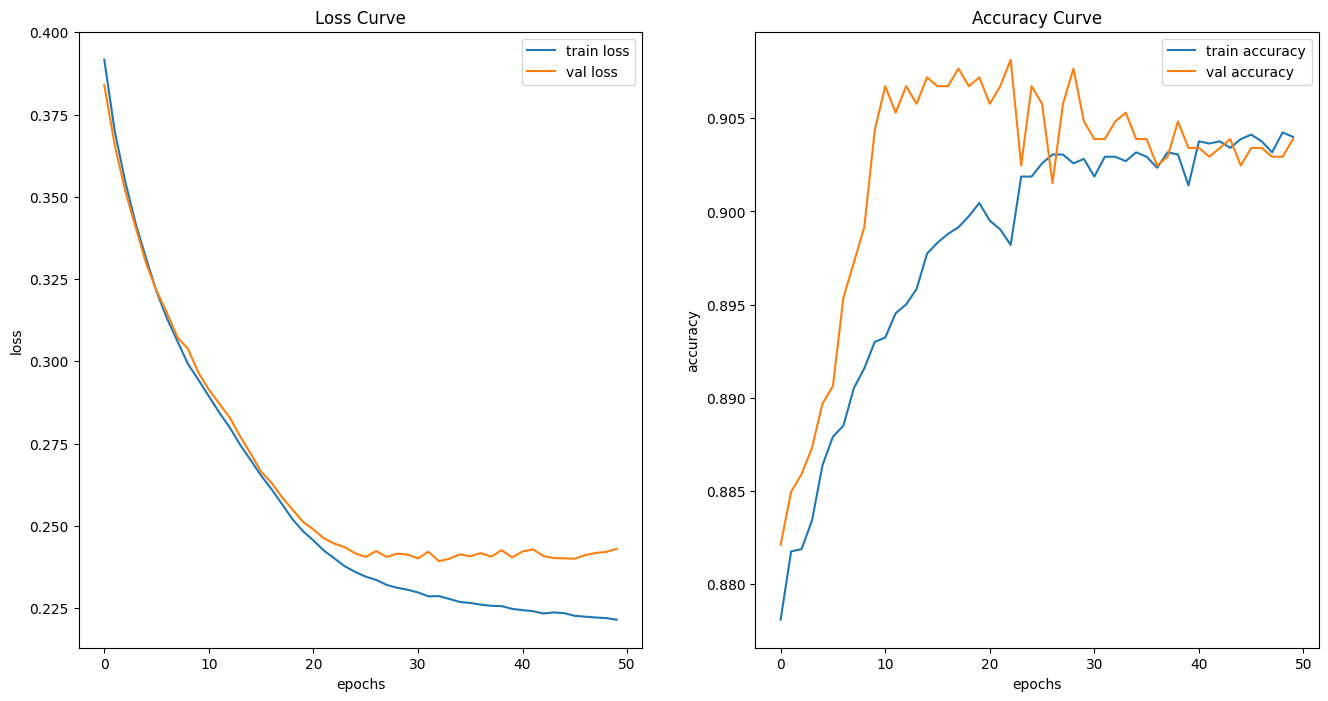

In [40]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

In [41]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_e,axis=1)
y_pred

array([3, 3, 3, ..., 2, 2, 0])

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

accuracy: 0.8946969696969697
recall: 0.8934307181721253
precision: 0.8970566552067991
f1 : 0.8942775859952273


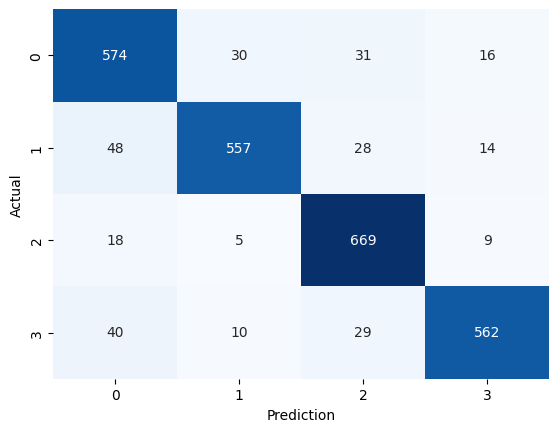

In [43]:
print_metrics(y_test, y_pred, aver='macro')